In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('C:\\Users\\PMLS\\1.python\\heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


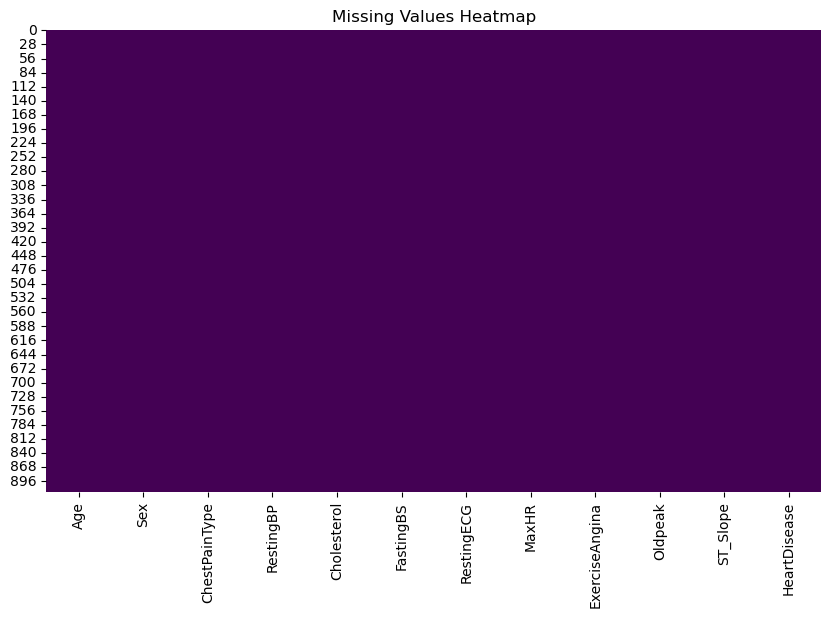

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
label_encoder = LabelEncoder()

for features in categorical_features:
    df[features] = label_encoder.fit_transform(df[features])

In [11]:
for features in categorical_features:
    print(df[features].unique())

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


In [12]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


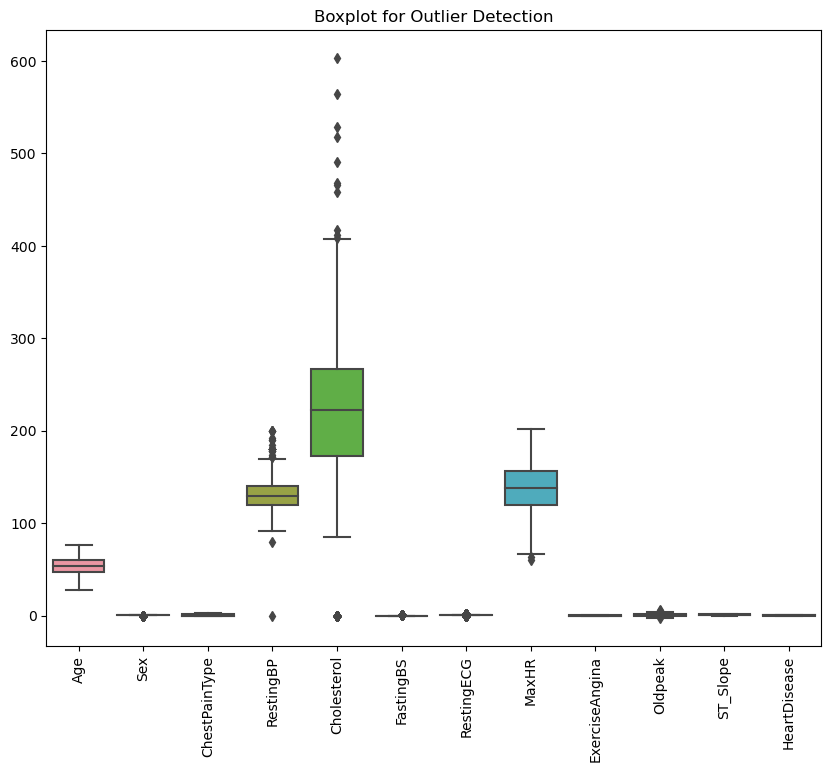

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [14]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease' ]

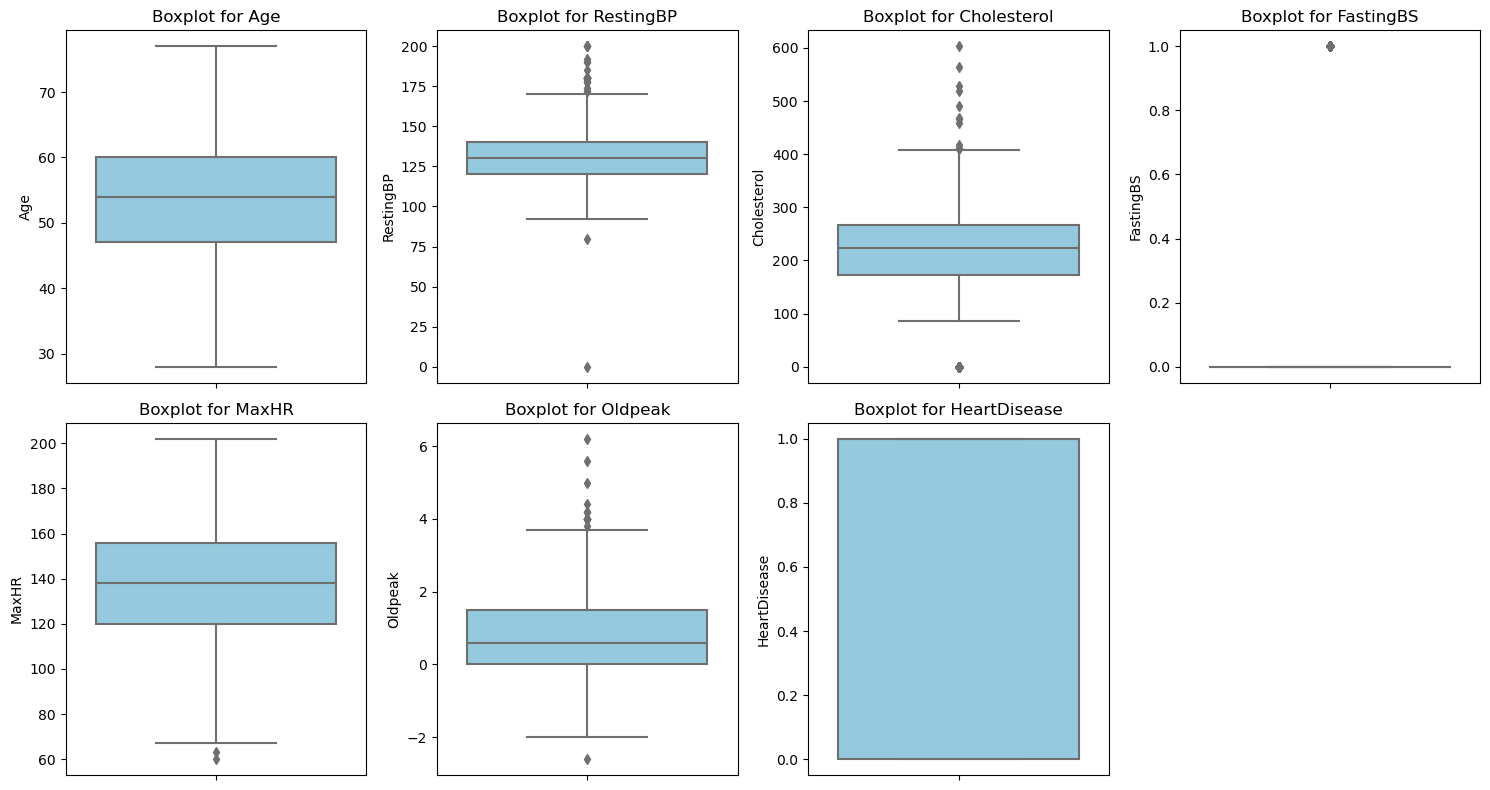

In [15]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i) 
    sns.boxplot(y=df[feature], color='skyblue') 
    plt.title(f'Boxplot for {feature}')  
plt.tight_layout() 
plt.show()

In [16]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR   

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_columns = []
for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    if outliers.empty:
        print(f'Column {col} has no outliers')
    else:
        print(f"Column: {col}")
        print(f"Number of Outliers: {len(outliers)}")
        outliers_columns.append(col)
    print('\n')

Column Age has no outliers


Column: RestingBP
Number of Outliers: 28


Column: Cholesterol
Number of Outliers: 183


Column: FastingBS
Number of Outliers: 214


Column: MaxHR
Number of Outliers: 2


Column: Oldpeak
Number of Outliers: 16


Column HeartDisease has no outliers




In [17]:
numerical_features.remove('Age')

In [18]:
numerical_features.remove('MaxHR')

In [19]:
numerical_features.remove('FastingBS')

In [20]:
numerical_features

['RestingBP', 'Cholesterol', 'Oldpeak', 'HeartDisease']

In [21]:
for col in numerical_features:
    print(f'Column : {col}')
    print(f'mean : {df[col].mean()}')
    print(f'median : {df[col].median()}')
    print(f'mode : {df[col].mode()}')
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                 
    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR   
    print(f'IQR : {IQR}')
    print(f'lower bond : {lower_bound}')
    print(f'upper bond : {upper_bound}')
    print('\n')

Column : RestingBP
mean : 132.39651416122004
median : 130.0
mode : 0    120
Name: RestingBP, dtype: int64
IQR : 20.0
lower bond : 90.0
upper bond : 170.0


Column : Cholesterol
mean : 198.7995642701525
median : 223.0
mode : 0    0
Name: Cholesterol, dtype: int64
IQR : 93.75
lower bond : 32.625
upper bond : 407.625


Column : Oldpeak
mean : 0.8873638344226581
median : 0.6
mode : 0    0.0
Name: Oldpeak, dtype: float64
IQR : 1.5
lower bond : -2.25
upper bond : 3.75


Column : HeartDisease
mean : 0.5533769063180828
median : 1.0
mode : 0    1
Name: HeartDisease, dtype: int64
IQR : 1.0
lower bond : -1.5
upper bond : 2.5




In [22]:
numerical_df = df[numerical_features]

In [23]:
numerical_df.describe()

,RestingBP,Cholesterol,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,0.887364,0.553377
std,18.514154,109.384145,1.066570,0.497414
min,0.000000,0.000000,-2.600000,0.000000
25%,120.000000,173.250000,0.000000,0.000000
50%,130.000000,223.000000,0.600000,1.000000
75%,140.000000,267.000000,1.500000,1.000000
max,200.000000,603.000000,6.200000,1.000000


In [24]:
def impute_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  

    mean_value = df[column].mean()
    
    df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

# Apply to numerical columns with outliers
for col in numerical_features:
    df = impute_outliers_with_mean(df, col)

print("Outliers replaced with mean successfully!")

Outliers replaced with mean successfully!


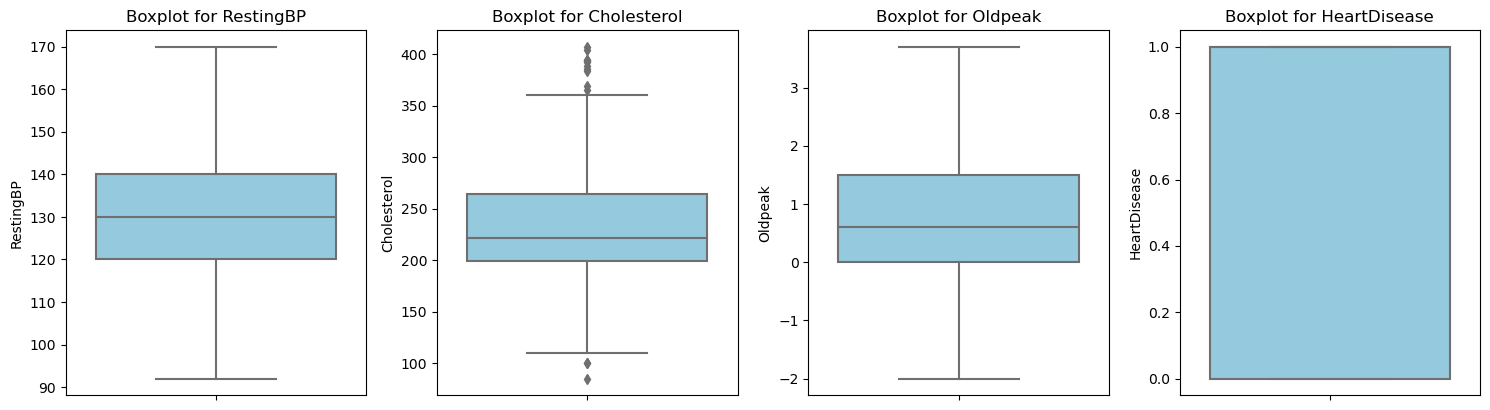

In [25]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i) 
    sns.boxplot(y=df[feature], color='skyblue')  
    plt.title(f'Boxplot for {feature}')  

plt.tight_layout()  
plt.show()

In [26]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                  
    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR  
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    if outliers.empty:
        print(f'Column {col} has no outliers')
    else:
        print(f"Column: {col}")
        print(f"Number of Outliers: {len(outliers)}")
        outliers_columns.append(col)
    print('\n')

Column RestingBP has no outliers


Column: Cholesterol
Number of Outliers: 14


Column Oldpeak has no outliers


Column HeartDisease has no outliers




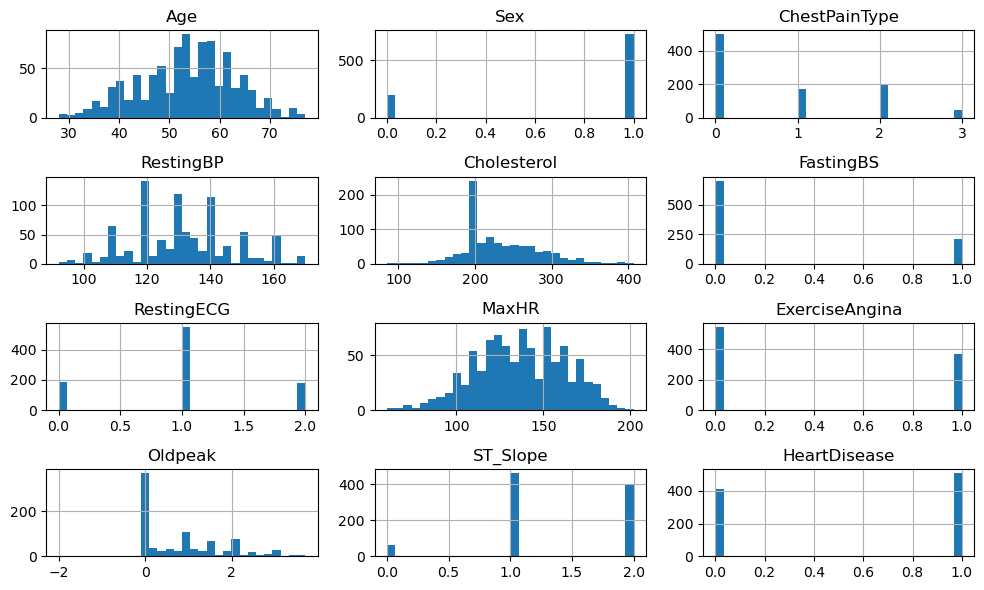

In [27]:
df.hist(figsize=(10, 6), bins=30)
plt.tight_layout()  
plt.show()

In [28]:
X = df.drop(columns=['HeartDisease'])
y = df[['HeartDisease']]

In [29]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [32]:
knn.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [33]:
accuracy_score(y_test,knn.predict(X_test))

0.8641304347826086

In [34]:
k_values = range(1, 50,2)

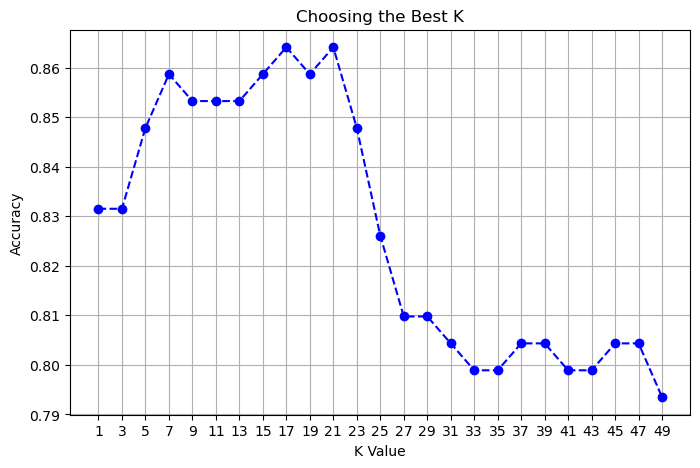

Best K: 17


<Figure size 640x480 with 0 Axes>

In [35]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")